# Analysis of Nutritional Content of Cereal and Shelf Location

## Dataset
- Cereal Dataset
- How was data collected?
  - A nutritionist at the Food and Drug Administration recorded data about cereal nutritional claims and shelf location for 77 cereals at a local grocery store.

## Statistical Data Analysis
 - How are cereals arranged among shelf locations?
 - What is the Relationship Among Nutritional Contents of Cereal?
 - Does shelf location relate to the nutritional content of the cereal?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
sns.set()

In [2]:
df = pd.read_excel('Cereal_Data.xlsx')
df.head()

,Shelf,Name,Manufacturer,Type,Calories,Protein,Fat,Sodium,Fiber,Carbohydrates,Sugars,Potassium,Vitamins,Weight (of One Serving Cup),Cups in Serving
0,Top,100%_Bran,N,C,70,4,1,130,10.0,5.0,6.0,280.0,25,1.0,0.33
1,Top,100%_Natural_Bran,Q,C,120,3,5,15,2.0,8.0,8.0,135.0,0,1.0,1.00
2,Top,All-Bran,K,C,70,4,1,260,9.0,7.0,5.0,320.0,25,1.0,0.33
3,Top,All-Bran_with_Extra_Fiber,K,C,50,4,0,140,14.0,8.0,0.0,330.0,25,1.0,0.50
4,Top,Almond_Delight,R,C,110,2,2,200,1.0,14.0,8.0,NaN,25,1.0,0.75


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 15 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Shelf                        77 non-null     object 
 1   Name                         77 non-null     object 
 2   Manufacturer                 77 non-null     object 
 3   Type                         77 non-null     object 
 4   Calories                     77 non-null     int64  
 5   Protein                      77 non-null     int64  
 6   Fat                          77 non-null     int64  
 7   Sodium                       77 non-null     int64  
 8   Fiber                        77 non-null     float64
 9   Carbohydrates                76 non-null     float64
 10  Sugars                       76 non-null     float64
 11  Potassium                    75 non-null     float64
 12  Vitamins                     77 non-null     int64  
 13  Weight (of One Serving

In [4]:
df.describe()

,Calories,Protein,Fat,Sodium,Fiber,Carbohydrates,Sugars,Potassium,Vitamins,Weight (of One Serving Cup),Cups in Serving
count,77.000000,77.000000,77.000000,77.000000,77.000000,76.000000,76.000000,75.000000,77.000000,77.000000,77.000000
mean,106.883117,2.545455,1.012987,159.675325,2.151948,14.802632,7.026316,98.666667,28.246753,1.029610,0.821039
std,19.484119,1.094790,1.006473,83.832295,2.383364,3.907326,4.378656,70.410636,22.342523,0.150477,0.232716
min,50.000000,1.000000,0.000000,0.000000,0.000000,5.000000,0.000000,15.000000,0.000000,0.500000,0.250000
25%,100.000000,2.000000,0.000000,130.000000,1.000000,12.000000,3.000000,42.500000,25.000000,1.000000,0.670000
50%,110.000000,3.000000,1.000000,180.000000,2.000000,14.500000,7.000000,90.000000,25.000000,1.000000,0.750000
75%,110.000000,3.000000,2.000000,210.000000,3.000000,17.000000,11.000000,120.000000,25.000000,1.000000,1.000000
max,160.000000,6.000000,5.000000,320.000000,14.000000,23.000000,15.000000,330.000000,100.000000,1.500000,1.500000


In [5]:
for col_name in df.select_dtypes(include=['object']):
    print(col_name)
    print('-------')
    print(df[col_name].value_counts().sort_values(ascending=False))
    print('\n')

Shelf
-------
Top       36
Middle    21
Bottom    20
Name: Shelf, dtype: int64


Name
-------
Wheaties_Honey_Gold      1
Puffed_Rice              1
Total_Corn_Flakes        1
Frosted_Flakes           1
Fruitful_Bran            1
                        ..
Raisin_Nut_Bran          1
Special_K                1
Cap'n'Crunch             1
Post_Nat._Raisin_Bran    1
Oatmeal_Raisin_Crisp     1
Name: Name, Length: 77, dtype: int64


Manufacturer
-------
K    23
G    22
P     9
Q     8
R     8
N     6
A     1
Name: Manufacturer, dtype: int64


Type
-------
C    74
H     3
Name: Type, dtype: int64




## Frequency Distribution

In [6]:
def annotate_plot(ax, n=0):
    # annotate bar
    for p in ax.patches:
        # annotate frequency
        if n == 0: h_adj = 1
        else: h_adj = 2
        ax.annotate(format(p.get_height(), '.0f'),
            (p.get_x() + p.get_width() / 2., p.get_height()/h_adj), ha = 'center', va = 'center', 
             xytext = (0, 10), textcoords = 'offset points')
        
        if n > 0:# annotate relative frequency
            ax.annotate(format(p.get_height()*100 / n, '.0f') + '%', 
               (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', 
                xytext = (0, 10), textcoords = 'offset points')  

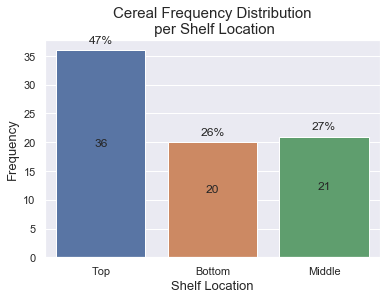

In [7]:
fig, ax = plt.subplots()
sns.countplot(x='Shelf', data=df, ax=ax)
annotate_plot(ax, len(df['Shelf']))
ax.set_ylabel('Frequency', fontsize=13)
plt.xlabel('Shelf Location', fontsize=13)
plt.title('Cereal Frequency Distribution\n per Shelf Location', fontsize=15)
plt.show()

47% of the cereals are put on the top shelf. Bottom shelf and middle shelf have about the same number of cereals.

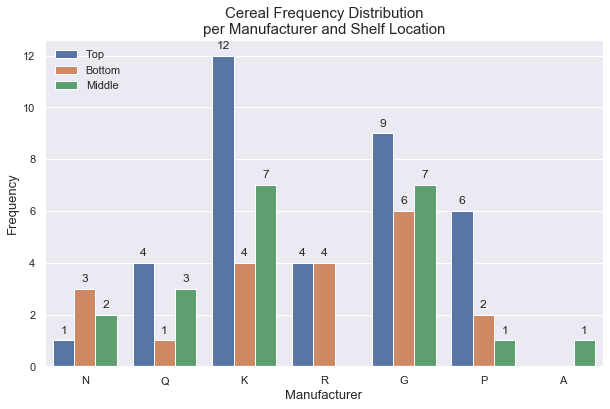

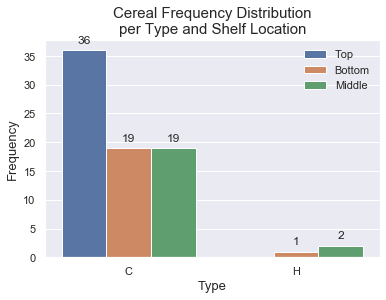

In [8]:
cols = ['Manufacturer', 'Type']
fsizes = [(10, 6), (6, 4)]
for index, col_name in enumerate(cols):
    fig, ax = plt.subplots(figsize=fsizes[index])
    ax = sns.countplot(x=col_name, data=df, hue='Shelf')
    annotate_plot(ax)
    ax.legend(loc='best', frameon=False)
    ax.xaxis.label.set_size(13)
    plt.ylabel('Frequency', size=13)
    plt.title('Cereal Frequency Distribution\nper ' + col_name + ' and Shelf Location', size=15)
    plt.show()

Most cereals have type C. Only 3 cereals have type H.

## Correlation among Cereal Nutritions

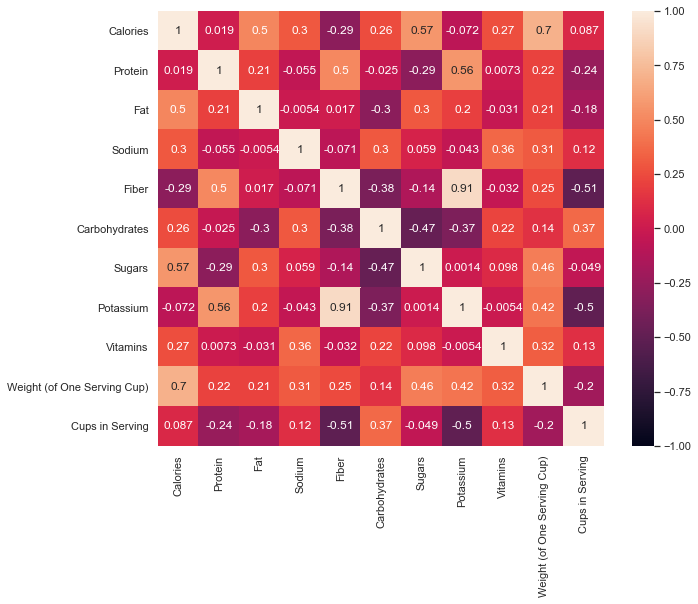

In [9]:
fig, ax = plt.subplots(figsize=(10, 8))
df_numeric = df.select_dtypes(include=['float64','int64'])
corr = df_numeric.corr()
sns.heatmap(corr, vmin=-1, vmax=1, annot=True)
plt.show()

In [10]:
# find a set of columns with strong correlation
corr_columns = []
for col_name in corr.columns:
    corr_cols = list(pd.DataFrame(corr[abs(corr[col_name]) > 0.5][col_name]).index)
    
    if len(corr_cols) > 1:
        found = False
        for c_list in corr_columns:
            set1 = set(corr_cols)
            set2 = set(c_list)
            if set1.issubset(set2):
                found = True
            elif set1.issuperset(set2):
                corr_columns.remove(c_list)
        if found == False:
            corr_columns.append(corr_cols)
# variables with high correlation
print(corr_columns)

[['Calories', 'Sugars', 'Weight (of One Serving Cup)'], ['Protein', 'Fiber', 'Potassium', 'Cups in Serving']]


Calories
-----
                             Calories    Sugars  Weight (of One Serving Cup)
Calories                     1.000000  0.566533                     0.696091
Sugars                       0.566533  1.000000                     0.455844
Weight (of One Serving Cup)  0.696091  0.455844                     1.000000


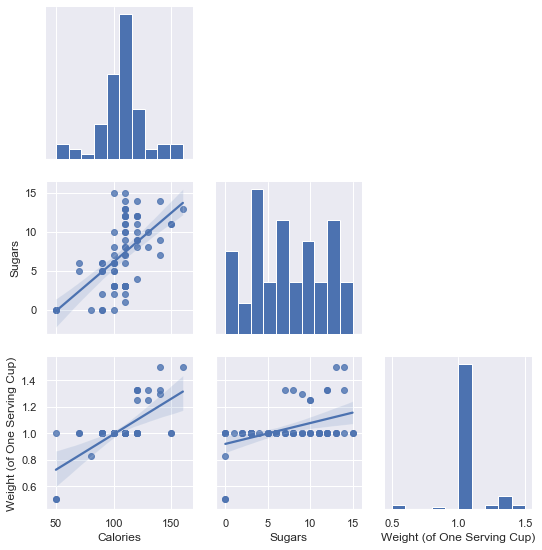

Protein
-----
                  Protein     Fiber  Potassium  Cups in Serving
Protein          1.000000  0.500330   0.563706        -0.244469
Fiber            0.500330  1.000000   0.911528        -0.513061
Potassium        0.563706  0.911528   1.000000        -0.501607
Cups in Serving -0.244469 -0.513061  -0.501607         1.000000


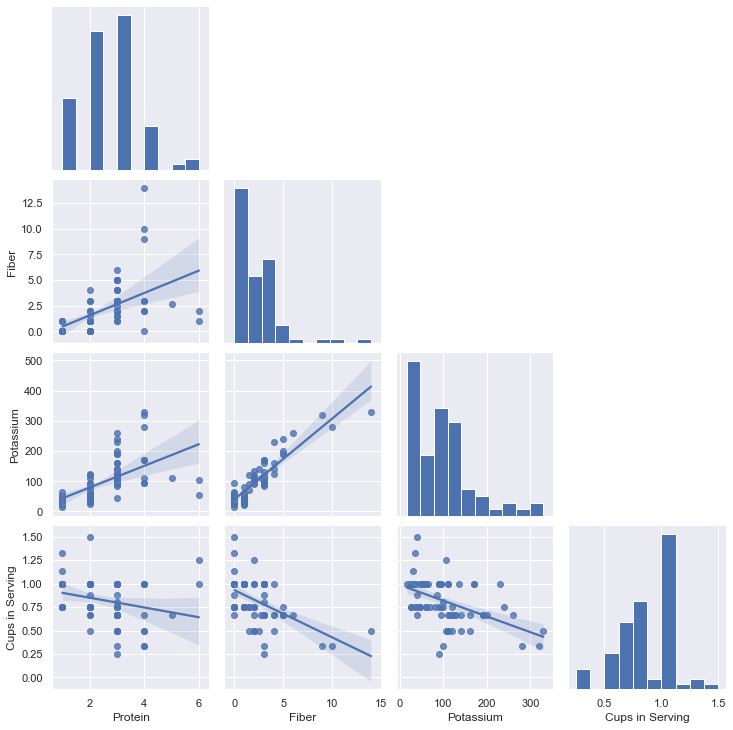

In [11]:
for col in corr_columns:
    print(col[0])
    print('-----')
    print(df[col].corr())
    ax = sns.pairplot(df[col], corner=True, kind='reg')
    plt.show()

## Violin Plot of Cereal Nutrition per Shelf Location

In [12]:
# create data frame to store t-test result
shelf_def = {'T': 'Top', 'B': 'Bottom', 'M': 'Middle'}
shelf_index = ['TB', 'BM', 'TM', 'TB_sig', 'BM_sig', 'TM_sig']
df_shelfs = pd.DataFrame(columns=df_numeric.columns, index=shelf_index)

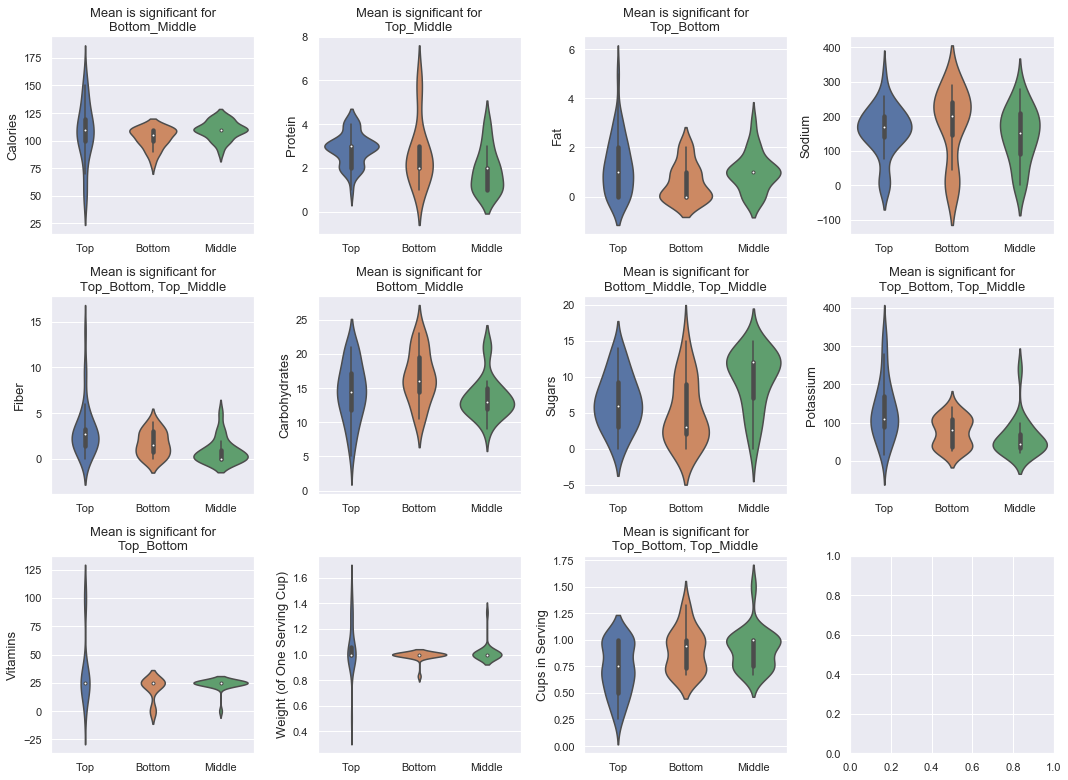

In [13]:
# calculate rows and columns for subplot
r = c = 0
n = len(df_numeric.columns)
n_cols = 4
n_rows = round(n / n_cols)
if n_rows*n_cols < n:
    n_rows = n_rows + 1
fig, ax = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(15,11))

for col_name in list(df_numeric.columns):
    # get data for computing t-test
    s_df = dict()
    for shelf in ['Top', 'Bottom', 'Middle']:
        s_df.update({shelf[0]: df[df['Shelf'] == shelf][col_name]})

    sig_label = []
    for index in shelf_index[:3]:   # compute t-test
        t, p = stats.ttest_ind(s_df[index[0]].dropna(), s_df[index[1]].dropna())

        # is there a significant difference in the mean of cereal nutrition between shelf locations
        if p < 0.05:
            sig = True
            sig_label.append(shelf_def[index[0]] + '_' + shelf_def[index[1]])
        else:
            sig = False
        
        # save the result to dataframe
        df_shelfs[col_name][index] = (round(t, 4), round(p, 4))
        df_shelfs[col_name][index + '_sig'] = sig
    
    # draw violin plot
    axis = ax[r, c]
    sns.violinplot(x='Shelf', y=col_name, data=df, ax=axis)
    axis.xaxis.label.set_visible(False)
    axis.yaxis.label.set_size(13)
    
    if len(sig_label) > 0:
        axis.set_title('Mean is significant for\n' + ', '.join(map(str, sig_label)), size=13)
    
    # set next row and column
    c = c + 1
    if c > n_cols - 1:
        c = 0
        r = r + 1
fig.tight_layout()
plt.show()

In [14]:
df_shelfs

,Calories,Protein,Fat,Sodium,Fiber,Carbohydrates,Sugars,Potassium,Vitamins,Weight (of One Serving Cup),Cups in Serving
TB,"(0.8464, 0.4011)","(0.7251, 0.4715)","(2.2194, 0.0307)","(-0.7396, 0.4627)","(2.1289, 0.0378)","(-1.8989, 0.063)","(1.2334, 0.2229)","(3.0853, 0.0032)","(2.2122, 0.0312)","(1.4248, 0.16)","(-2.6975, 0.0093)"
BM,"(-2.6205, 0.0125)","(1.9173, 0.0625)","(-1.6744, 0.1021)","(1.0465, 0.3018)","(1.8532, 0.0714)","(2.8996, 0.0062)","(-3.3151, 0.002)","(1.0569, 0.2972)","(-1.4947, 0.143)","(-1.3364, 0.1892)","(-0.2352, 0.8153)"
TM,"(-0.2885, 0.774)","(4.1838, 0.0001)","(0.8663, 0.3901)","(0.6217, 0.5367)","(3.3491, 0.0015)","(0.8442, 0.4022)","(-2.8538, 0.0061)","(3.7345, 0.0005)","(1.744, 0.0868)","(0.9135, 0.365)","(-3.0351, 0.0037)"
TB_sig,False,False,True,False,True,False,False,True,True,False,True
BM_sig,True,False,False,False,False,True,True,False,False,False,False
TM_sig,False,True,False,False,True,False,True,True,False,False,True


## Cereal Nutrition per Manufacturer

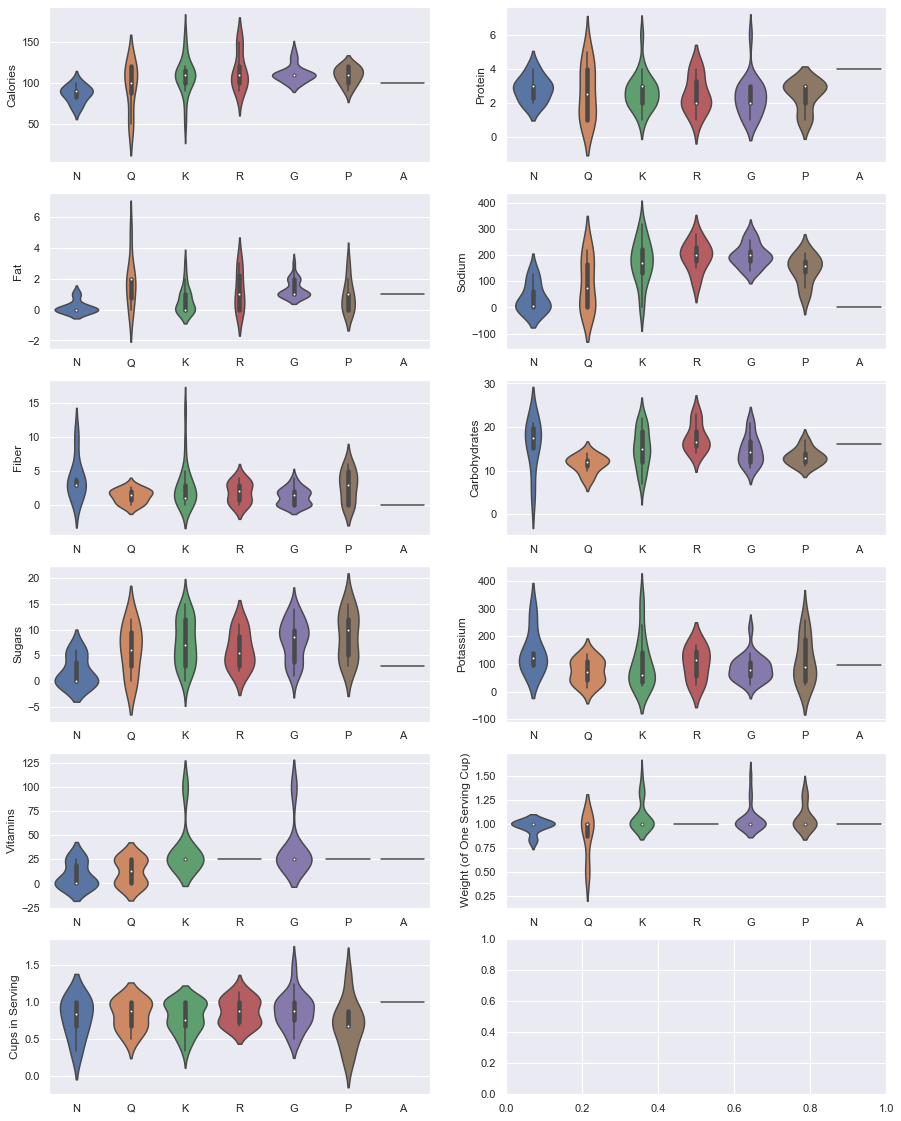

In [15]:
r = c = 0
n = len(df_numeric.columns)
n_cols = 2
n_rows = round(n / n_cols)

if n_rows*n_cols < n:
    n_rows = n_rows + 1
fig, ax = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(15,20))

for col_name in list(df_numeric.columns):
    axis = ax[r, c]
    sns.violinplot(x='Manufacturer', y=col_name, data=df, ax=axis)
    axis.xaxis.label.set_visible(False)
    # set next row and column
    c = c + 1
    if c > n_cols - 1:
        c = 0
        r = r + 1

plt.show()